## 时间序列分析应用练习

---

本次挑战将关注于时间序列分析及应用，首先导入挑战所需的部分模块。

In [1]:
import warnings
import numpy as np
import pandas as pd
import os
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests
import pandas as pd
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

首先读取并加载示例数据集，这里选择了维基百科 Machine Learning 页面每日浏览量统计数据。

In [2]:
df = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/1283/wiki_machine_learning.csv', sep=' ')
df = df[df['count'] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
df.shape

(383, 7)

### Prophet 建模预测

首先，挑战需要将原数据中的时间字符串处理成日期格式。

In [4]:
df.date = pd.to_datetime(df.date)
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [5]:
df.tail()

,date,count,lang,page,rank,month,title
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning
372,2016-01-20,3559,en,Machine_learning,8708,201601,Machine_learning


接下来，使用 plotly 提供的方法定义一个 `plotly_df` 函数，以方便绘制出可交互式图像。

In [6]:
def plotly_df(df, title=''):
    data = []
    for column in df.columns:
        trace = go.Scatter(
            x=df.index,
            y=df[column],
            mode='lines',
            name=column
        )
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

然后，利用定义好的绘图函数，绘制数据集浏览量随时间的变化情况。

In [7]:
plotly_df(df.set_index('date')[['count']])

下面，我们尝试使用 Prophet 预测时间序列数据。首先将 DataFrame 处理成 Prophet 支持的格式。

In [8]:
df = df[['date', 'count']]
df.columns = ['ds', 'y']
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


然后，将原始数据后 30 条切分用于预测，只使用 30 条之前的历史数据进行建模。

In [9]:
predictions = 30
train_df = df[:-predictions].copy()
train_df.tail()

,ds,y
358,2015-12-17,2870
363,2015-12-18,2475
364,2015-12-19,1659
344,2015-12-20,1534
343,2015-12-21,2425


<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>请使用 Prophet 对 `train_df` 数据建模，预测后 30 天的结果。并回答 1 月 20 日当天的预测结果是多少？【3426】

In [10]:
from fbprophet import Prophet

m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2979.319903,1701.793838,2548.354569,2957.955338,2995.577229,-861.693311,-861.693311,-861.693311,-861.693311,-861.693311,-861.693311,0.0,0.0,0.0,2117.626592
379,2016-01-17,2984.727592,1853.267100,2655.691825,2962.443180,3001.966663,-720.705354,-720.705354,-720.705354,-720.705354,-720.705354,-720.705354,0.0,0.0,0.0,2264.022238
380,2016-01-18,2990.135281,2901.213626,3683.857971,2966.530182,3008.573559,281.357669,281.357669,281.357669,281.357669,281.357669,281.357669,0.0,0.0,0.0,3271.492950
381,2016-01-19,2995.542971,3152.992390,3932.271914,2971.125501,3015.053759,541.423837,541.423837,541.423837,541.423837,541.423837,541.423837,0.0,0.0,0.0,3536.966808
382,2016-01-20,3000.950660,3011.914054,3811.429362,2975.435790,3021.728002,425.547911,425.547911,425.547911,425.547911,425.547911,425.547911,0.0,0.0,0.0,3426.498570


<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>Prophet 预测值和真实值之间的 MAPE 和 MSE 值为多少？【MAPE = 34.5，MAE = 599.84】

In [12]:
cmp_df = forecast.set_index(
    'ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2015-01-01,2493.394569,2091.444237,2914.335566,1414
2015-01-02,2176.170858,1750.099098,2566.574607,1920
2015-01-03,1310.164121,913.980981,1735.730852,1338
2015-01-04,1453.891639,1067.126624,1854.486762,1404
2015-01-05,2458.694224,2059.666724,2873.402627,2264


In [13]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100 * cmp_df['e'] / cmp_df['y']
print('MAPE = ', round(np.mean(abs(cmp_df[-predictions:]['p'])), 2))
print('MAE = ', round(np.mean(abs(cmp_df[-predictions:]['e'])), 2))

MAPE =  34.5
MAE =  599.84


### ARIMA 建模预测

接下来，使用 statsmodels 提供的相关方法进行时间序列建模。同样先导入一些需要的模块：

In [14]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>下面使用 Dickey-Fuller 测试来验证序列的平稳性。`train_df` 是平稳序列吗？最终的 p 值是多少？【不平稳，p_value = 0.107】

Dickey-Fuller test: p=0.107392


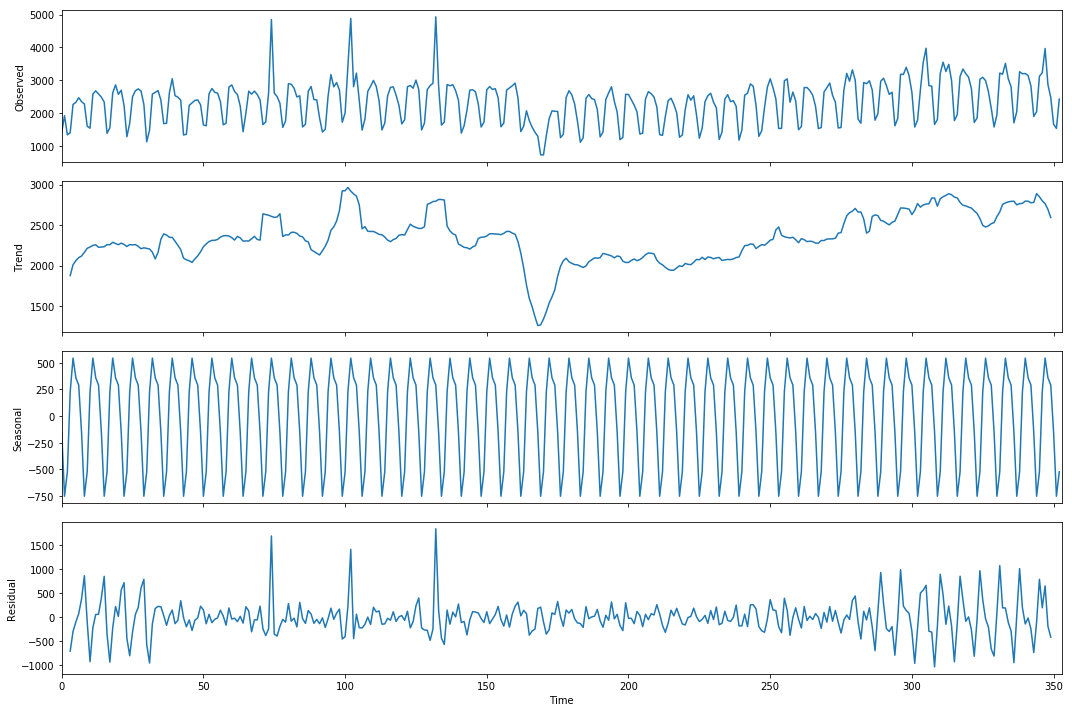

In [15]:
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df['y'])[1])

---

<div style="background-color: #e6e6e6; margin-bottom: 10px; padding: 1%; border: 1px solid #ccc; border-radius: 6px;text-align: center;"><a href="https://nbviewer.jupyter.org/github/shiyanlou/mlcourse-answers/tree/master/" title="挑战参考答案"><i class="fa fa-file-code-o" aria-hidden="true"> 查看挑战参考答案</i></a></div>